In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [14]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/PWC_COVID19")

In [15]:
df = pd.read_excel('3.0.xlsx')

In [16]:
df1 = pd.read_excel('3.1.xlsx')

## Python panda reading method

In [24]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Python panda variable name change 

In [17]:
df1.rename(columns={'WRKLOSSRV':'WRKLOSS',
                    'RSNNOWRKRV':'RSNNOWRK',
                    'UI_APPLYRV':'UI_APPLY',
                    'UI_RECVRV':'UI_RECV',
                    'SSA_APPLYRV':'SSA_APPLY',
                    'SSAPGMRV1':'SSAPGM1',
                    'SSAPGMRV2':'SSAPGM2',
                    'SSAPGMRV3':'SSAPGM3',
                    'SSAPGMRV4':'SSAPGM4',
                    'SSAPGMRV5':'SSAPGM5',
                    'SSALIKELYRV':'SSALIKELY',
                    'EIPRV':'EIP',
                    'FOODRSNRV1':'FOODSUFRSN1',
                    'FOODRSNRV2':'FOODSUFRSN2',
                    'FOODRSNRV3':'FOODSUFRSN3',
                    'FOODRSNRV4':'FOODSUFRSN4',
                    'LIVQRRV':'LIVQTR',
                    
                   },inplace = True)

In [18]:
df3 = [df1, df]

In [19]:
df3 = pd.concat(df3)

## Pick up New Variables 

In [ ]:
df5= df4.drop(['Unnamed: 0'], axis=1)

In [21]:
df4 = df3[['SCRAM','TBIRTH_YEAR','EGENDER','RHISPANIC','RRACE','EEDUC','MS','THHLD_NUMPER','THHLD_NUMKID','THHLD_NUMADLT','RECVDVACC','DOSES','GETVACC','WHYNOT1','WHYNOT2','WHYNOT3','WHYNOT4','WHYNOT5','WHYNOT6','WHYNOT7','WHYNOT8','WHYNOT9','WHYNOT10','WHYNOT11','WHYNOTB1','WHYNOTB2','WHYNOTB3','WHYNOTB4','WHYNOTB5','WHYNOTB6','HADCOVID','WRKLOSS','EXPCTLOSS','ANYWORK','KINDWORK','RSNNOWRK','TW_START','UI_APPLY','UI_RECV','SSA_RECV','SSA_APPLY','SSAPGM1','SSAPGM2','SSAPGM3','SSAPGM4','SSAPGM5','SSALIKELY','SSAEXPCT1','SSAEXPCT2','SSAEXPCT3','SSAEXPCT5','SSADECISN','EIP','EXPNS_DIF','SPNDSRC1','SPNDSRC2','SPNDSRC3','SPNDSRC4','SPNDSRC5','SPNDSRC6','SPNDSRC7','SPNDSRC8','CURFOODSUF','CHILDFOOD','FREEFOOD','SNAP_YN','ANXIOUS','WORRY','INTEREST','DOWN','HLTHINS1','HLTHINS2','HLTHINS3','HLTHINS4','HLTHINS5','HLTHINS6','HLTHINS7','HLTHINS8','DELAY','NOTGET','PRESCRIPT','MH_SVCS','MH_NOTGET','TENURE','LIVQTR','RENTCUR','MORTCUR','MORTCONF','EVICT','FORCLOSE','ENROLL1','ENROLL2','ENROLL3','TEACH5','COMPAVAIL','INTRNTAVAIL','INCOME','EST_ST','PRIVHLTH','PUBHLTH','REGION','WEEK']].copy()

In [22]:
df4.replace(-88, pd.NA, inplace=True)

In [23]:
[sum(df4[i].isnull()) for i in df4.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 319,
 0,
 0,
 0,
 319,
 378326,
 522969,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 697091,
 853415,
 853415,
 853415,
 853415,
 853415,
 853415,
 319,
 319,
 319,
 319,
 371632,
 519528,
 425779,
 4403,
 391324,
 8290,
 11162,
 853619,
 853619,
 853619,
 853619,
 853619,
 307907,
 847704,
 847704,
 847704,
 847704,
 283003,
 387799,
 38339,
 86370,
 86370,
 86370,
 86370,
 86370,
 86370,
 86370,
 86370,
 91570,
 810027,
 94556,
 96034,
 144802,
 144802,
 144802,
 144802,
 154384,
 154384,
 154384,
 154384,
 154384,
 154384,
 154384,
 154384,
 163327,
 163327,
 163327,
 163327,
 163327,
 173671,
 509287,
 730723,
 542405,
 389465,
 866137,
 863216,
 758017,
 758017,
 758017,
 727171,
 727171,
 727979,
 196410,
 0,
 0,
 0,
 0,
 0]

In [25]:
df4.count() / len(df4)

SCRAM            1.000000
TBIRTH_YEAR      1.000000
EGENDER          1.000000
RHISPANIC        1.000000
RRACE            1.000000
EEDUC            1.000000
MS               0.999639
THHLD_NUMPER     1.000000
THHLD_NUMKID     1.000000
THHLD_NUMADLT    1.000000
RECVDVACC        0.999639
DOSES            0.572366
GETVACC          0.408871
WHYNOT1          0.212055
WHYNOT2          0.212055
WHYNOT3          0.212055
WHYNOT4          0.212055
WHYNOT5          0.212055
WHYNOT6          0.212055
WHYNOT7          0.212055
WHYNOT8          0.212055
WHYNOT9          0.212055
WHYNOT10         0.212055
WHYNOT11         0.212055
WHYNOTB1         0.035357
WHYNOTB2         0.035357
WHYNOTB3         0.035357
WHYNOTB4         0.035357
WHYNOTB5         0.035357
WHYNOTB6         0.035357
HADCOVID         0.999639
WRKLOSS          0.999639
EXPCTLOSS        0.999639
ANYWORK          0.999639
KINDWORK         0.579932
RSNNOWRK         0.412760
TW_START         0.518728
UI_APPLY         0.995023
UI_RECV     

In [26]:
df5= df4.drop(['WHYNOT1','WHYNOT2','WHYNOT3','WHYNOT4','WHYNOT5','WHYNOT6','WHYNOT7','WHYNOT8','WHYNOT9','WHYNOT10','WHYNOT11','WHYNOTB1','WHYNOTB2','WHYNOTB3','WHYNOTB4','WHYNOTB5','WHYNOTB6','SSAPGM1','SSAPGM2','SSAPGM3','SSAPGM4','SSAPGM5','SSAEXPCT1','SSAEXPCT2','SSAEXPCT3','SSAEXPCT5','CHILDFOOD','RENTCUR','MORTCUR','EVICT','FORCLOSE','ENROLL1','ENROLL2','ENROLL3','TEACH5','COMPAVAIL','INTRNTAVAIL'], axis=1)

In [30]:
df5.dtypes

TBIRTH_YEAR        int64
EGENDER            int64
RHISPANIC          int64
RRACE              int64
EEDUC              int64
MS               float64
THHLD_NUMPER       int64
THHLD_NUMKID       int64
THHLD_NUMADLT      int64
RECVDVACC        float64
DOSES            float64
GETVACC          float64
HADCOVID         float64
WRKLOSS          float64
EXPCTLOSS        float64
ANYWORK          float64
KINDWORK         float64
RSNNOWRK         float64
TW_START         float64
UI_APPLY         float64
UI_RECV          float64
SSA_RECV         float64
SSA_APPLY        float64
SSALIKELY        float64
SSADECISN        float64
EIP              float64
EXPNS_DIF        float64
CURFOODSUF       float64
FREEFOOD         float64
SNAP_YN          float64
ANXIOUS          float64
WORRY            float64
INTEREST         float64
DOWN             float64
DELAY            float64
NOTGET           float64
PRESCRIPT        float64
MH_SVCS          float64
MH_NOTGET        float64
TENURE           float64


In [32]:
df5.replace(-99, pd.NA, inplace=True)

In [33]:
df5.count() / len(df5)

TBIRTH_YEAR      1.000000
EGENDER          1.000000
RHISPANIC        1.000000
RRACE            1.000000
EEDUC            1.000000
MS               0.989339
THHLD_NUMPER     1.000000
THHLD_NUMKID     1.000000
THHLD_NUMADLT    1.000000
RECVDVACC        0.993538
DOSES            0.561393
GETVACC          0.403229
HADCOVID         0.993741
WRKLOSS          0.993081
EXPCTLOSS        0.992037
ANYWORK          0.992692
KINDWORK         0.570711
RSNNOWRK         0.406921
TW_START         0.492616
UI_APPLY         0.982680
UI_RECV          0.547860
SSA_RECV         0.982020
SSA_APPLY        0.976307
SSALIKELY        0.650998
SSADECISN        0.672666
EIP              0.556324
EXPNS_DIF        0.949727
CURFOODSUF       0.889756
FREEFOOD         0.886652
SNAP_YN          0.879598
ANXIOUS          0.830022
WORRY            0.828526
INTEREST         0.828123
DOWN             0.828793
DELAY            0.808575
NOTGET           0.808967
PRESCRIPT        0.808400
MH_SVCS          0.808151
MH_NOTGET   

In [34]:
df5.to_csv("9.0.csv")

## Decision Tree Model for Vaccine  Intention 

In [2]:
import pandas as pd 
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
import os

In [3]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/PWC_COVID19")

In [5]:
df = pd.read_excel('predict9.0.xlsx')

1    271155
0    102799
Name: GETVACC, dtype: int64


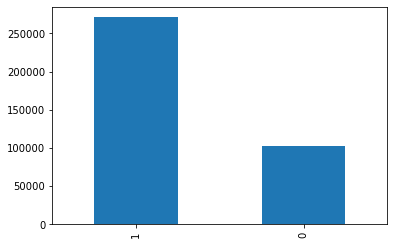

In [6]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["GETVACC"].map(lambda x: color_wheel.get(x + 1))
print(df.GETVACC.value_counts())
p=df.GETVACC.value_counts().plot(kind="bar")

## Build A Preliminary Classification Tree

In [7]:
y = df.GETVACC
X = df.drop('GETVACC', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.25)

## create a decision tree fit it to the training data 
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_dt = clf_dt.fit(X_train,y_train)

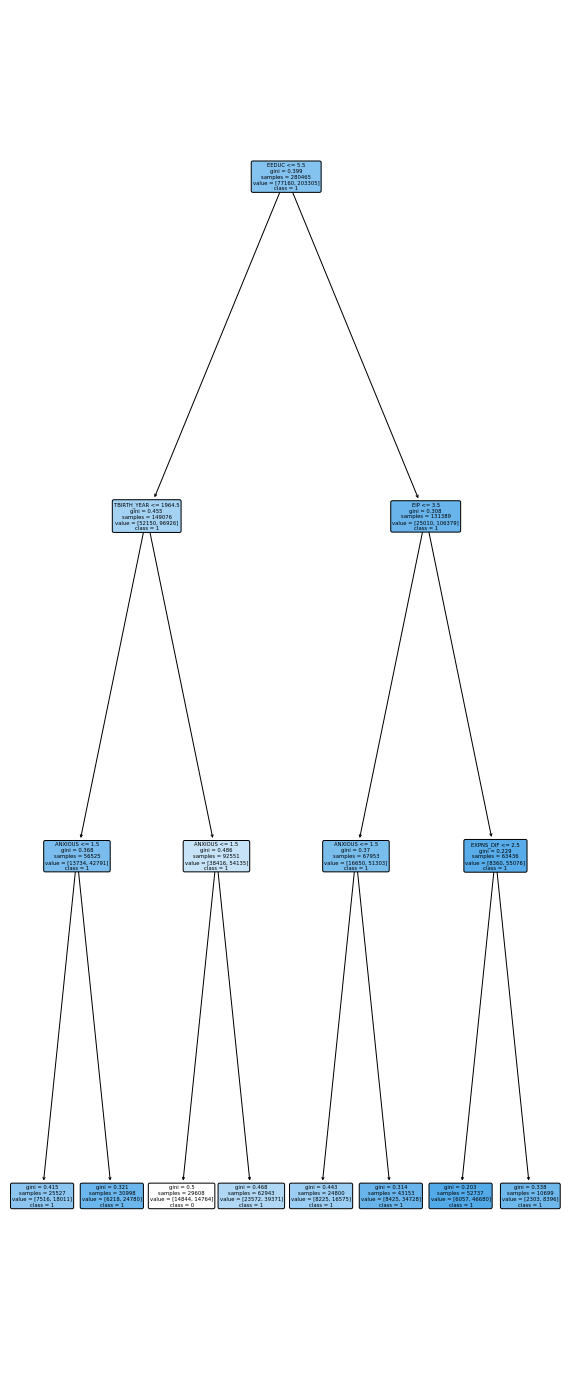

In [8]:
plt.figure(figsize=(10, 25))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names = ["0","1"],
          feature_names=X.columns);

In [9]:
y_pred = clf_dt.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5002 20637]
 [ 4878 62972]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.20      0.28     25639
           1       0.75      0.93      0.83     67850

    accuracy                           0.73     93489
   macro avg       0.63      0.56      0.56     93489
weighted avg       0.69      0.73      0.68     93489



## Cost Complexity Pruning Part1 :Visualize alpha 

## Decision Trees 
are notorious for being overfit to the Training Dataset, and there are a lot of parameters, like max_depth and min_samples, that are designed to reduce overfitting. However, pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that imporves the accuracy with Testing Dataset

## Purning a decision tree 
is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values. We'll do this for both the Training Dataset and the Testing Dataset

First, lets extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha. Note: We omit the maximum value for alpha with ccp_alphas = ccp_alphas[:-1] because would prune all leaves, leaving us with only a root insted of a tree.

In [11]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha 
ccp_alphas = ccp_alphas[:-1]  # exclude the maximum value for alpha 

clf_dts =[] # create an array that we will put decision trees it in the array 

##
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier( random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

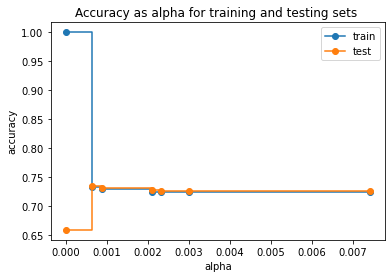

In [12]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy as alpha for training and testing sets ")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

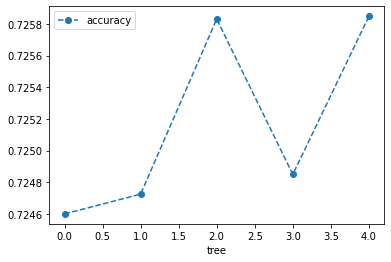

In [13]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle = '--')

In [14]:
alpha_loop_values =[]

<AxesSubplot:xlabel='alpha'>

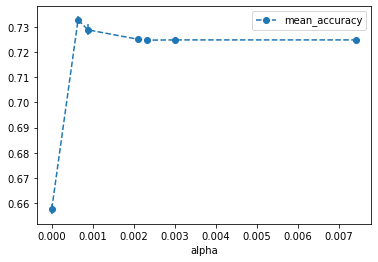

In [15]:
## fOr each candidate value for alpha, we will run 5-fold cross validation 
## Then we will store the mean and standard devation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values.. 

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores 
## for each candidate value for alpha 
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [16]:
ideal_ccp_alpha = 0.0008

In [17]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

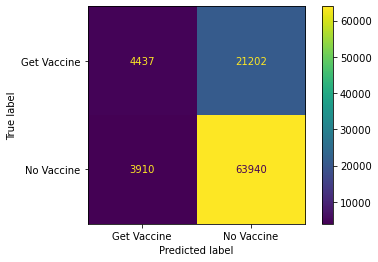

In [18]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Get Vaccine", "No Vaccine"])

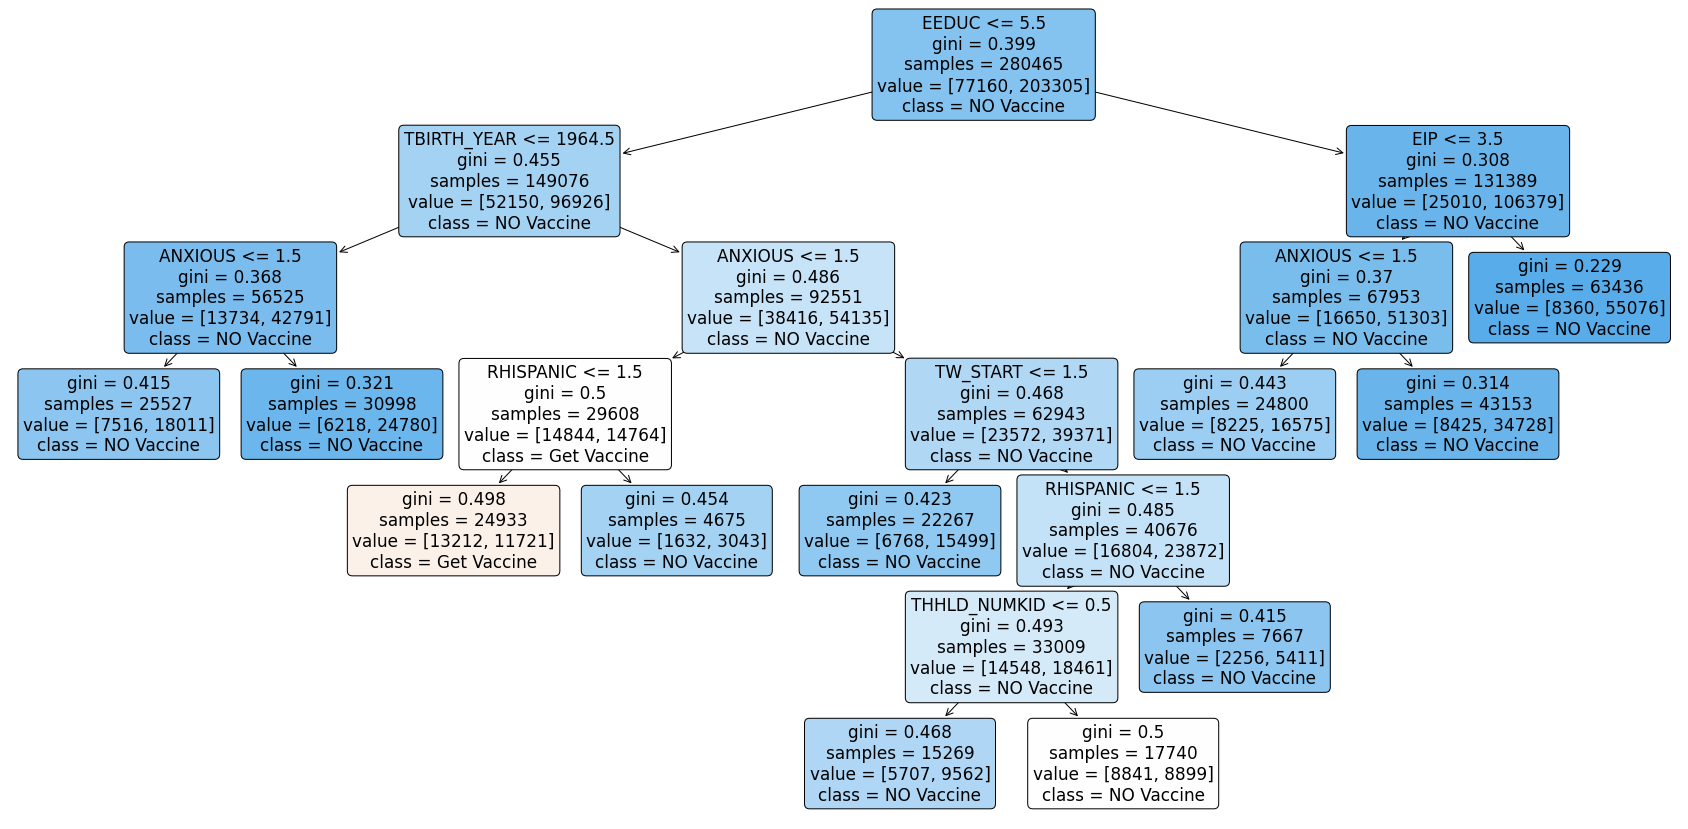

In [19]:
plt.figure(figsize = (30, 15))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["Get Vaccine", "NO Vaccine"],
          feature_names= X.columns);

## Use SMOTE deal with imblance dataset 


In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=15, stratify=y_smote)

## Rerun the Model


In [24]:
## create a decision tree fit it to the training data 
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_dt = clf_dt.fit(X_train,y_train)

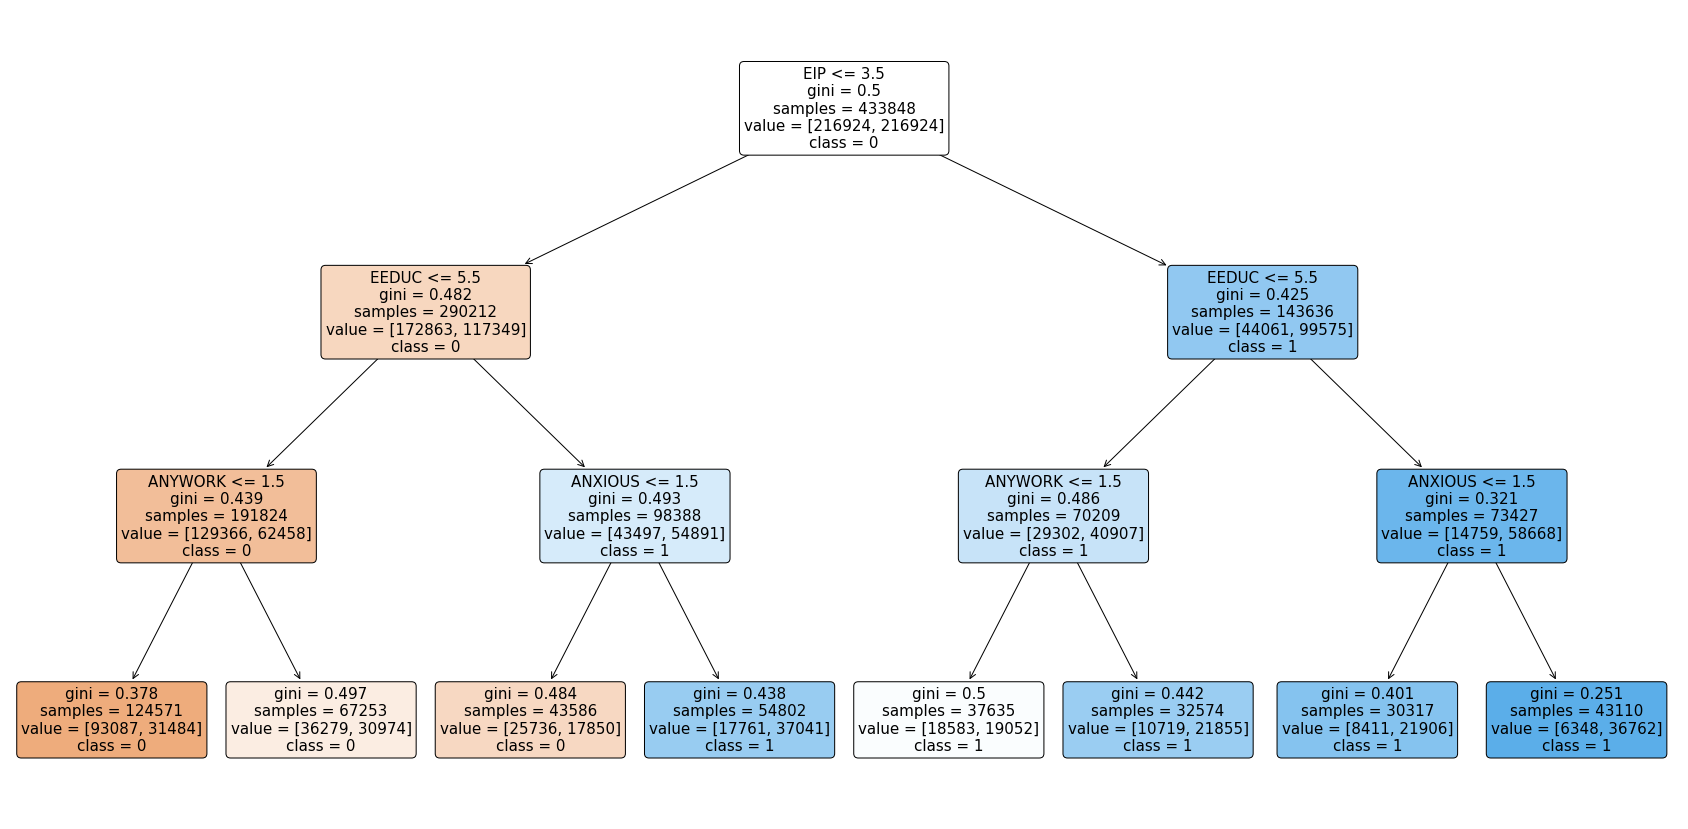

In [25]:
plt.figure(figsize=(30, 15))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names = ["0","1"],
          feature_names=X.columns);

In [26]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas  # extract different values for alpha 
ccp_alphas = ccp_alphas[:-1]  # exclude the maximum value for alpha 

clf_dts =[] # create an array that we will put decision trees it in the array 

##
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier( random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

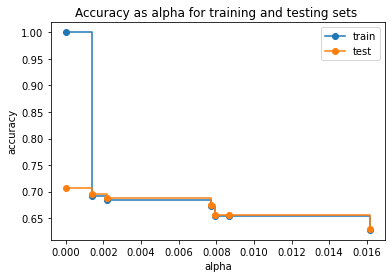

In [27]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy as alpha for training and testing sets ")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

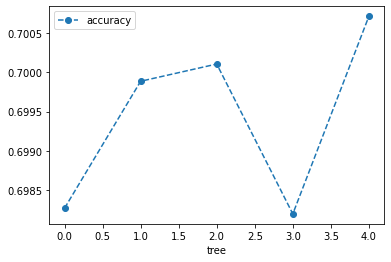

In [28]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle = '--')

In [29]:
alpha_loop_values =[]

<AxesSubplot:xlabel='alpha'>

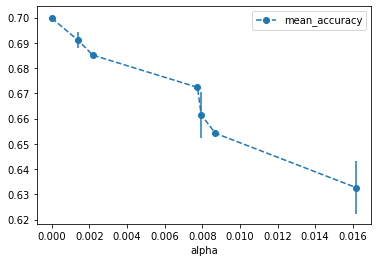

In [30]:
## fOr each candidate value for alpha, we will run 5-fold cross validation 
## Then we will store the mean and standard devation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values.. 

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
## Now we can draw a graph of the means and standard deviations of the scores 
## for each candidate value for alpha 
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [31]:
ideal_ccp_alpha = 0.00125

In [32]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

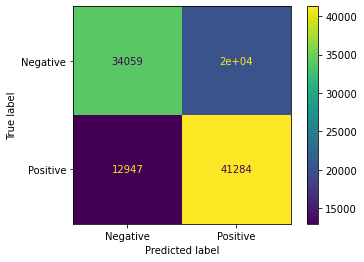

In [33]:
y_pred = clf_dt_pruned.predict(X_test)
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Negative", "Positive"])

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.63      0.67     54231
           1       0.67      0.76      0.71     54231

    accuracy                           0.69    108462
   macro avg       0.70      0.69      0.69    108462
weighted avg       0.70      0.69      0.69    108462



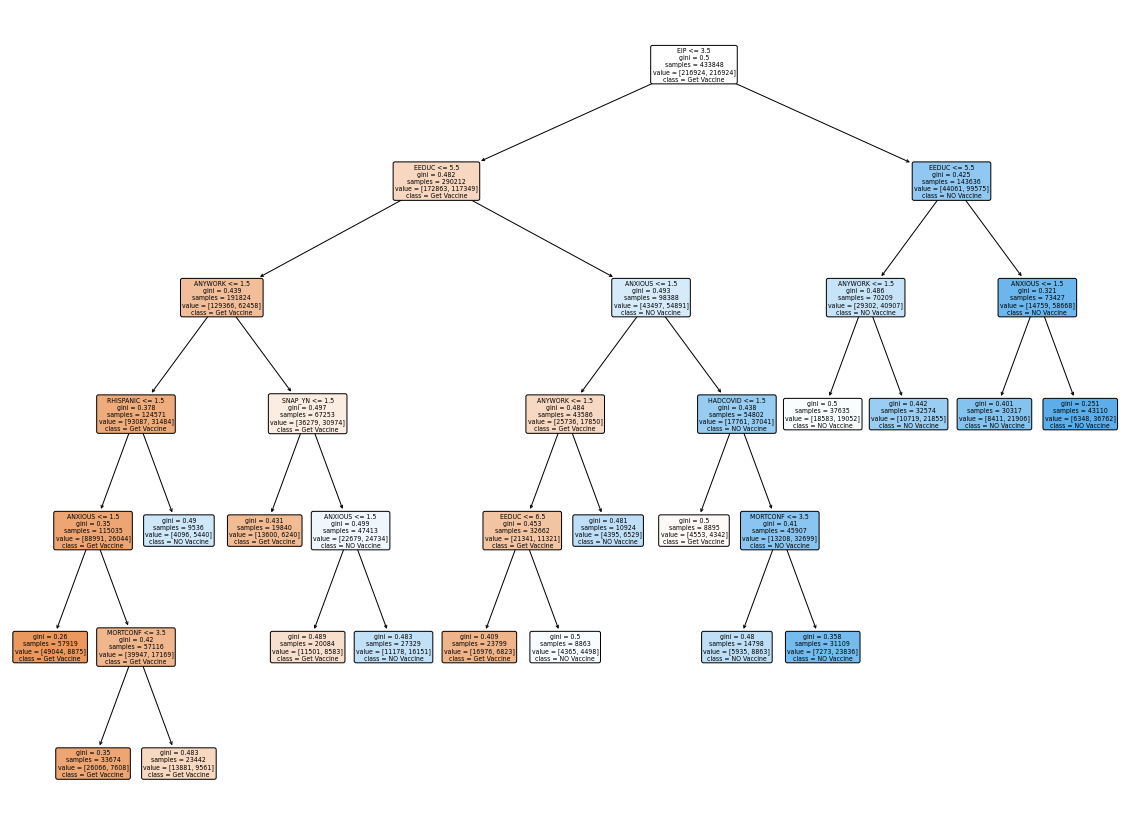

In [35]:
plt.figure(figsize = (20, 15))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["Get Vaccine", "NO Vaccine"],
          feature_names= X.columns);

## Random Forest 


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


import statsmodels.api as sm
from sklearn.tree import export_graphviz
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os

In [44]:
cwd =os.getcwd()
os.chdir("/Users/luqingqi/Desktop/PWC_COVID19")

In [47]:
cf = pd.read_excel('predict9.0.xlsx')

In [49]:
cf

,TBIRTH_YEAR,EGENDER,RHISPANIC,RRACE,EEDUC,MS,THHLD_NUMPER,THHLD_NUMKID,THHLD_NUMADLT,DOSES,...,MH_SVCS,MH_NOTGET,TENURE,LIVQTR,MORTCONF,INCOME,EST_ST,PRIVHLTH,PUBHLTH,REGION
0,1957,2,1,2,2,1,1,0,1,1,...,2,2,1,2,4,1,1,3,3,2
1,1982,2,1,1,5,1,5,3,2,1,...,2,2,3,9,4,4,2,3,3,4
2,1982,2,1,1,6,1,2,0,2,1,...,1,2,2,2,4,6,2,1,2,4
3,1987,1,2,2,3,5,4,2,2,1,...,2,2,3,2,4,3,12,2,2,2
4,1990,2,1,1,7,1,5,3,2,1,...,1,1,2,2,3,3,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373949,1976,1,1,1,6,1,4,2,2,2,...,2,2,3,3,4,1,12,2,1,2
373950,1950,1,1,1,4,1,2,0,2,1,...,2,2,1,2,4,6,24,3,1,2
373951,1992,1,1,1,6,5,2,0,2,1,...,2,2,2,2,3,4,54,2,2,2
373952,1976,2,1,1,6,1,3,1,2,1,...,2,2,1,2,3,6,55,1,3,3


## Use SMOTE PACKAGE Deal With Imblance Data

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=15, stratify=y_smote)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)

rfc.fit(X_train, y_train);

## Random Forest Classifier model with parameter n_estimators=100 

In [56]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees ; {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with 100 decision-trees ; 0.6946


## ## Random Forest Classifier model with parameter n_estimators=400 

In [58]:
rfc_100 = RandomForestClassifier(n_estimators=400, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 400 decision-trees ; {0:0.4f}'. format(accuracy_score(y_test,y_pred)))

Model accuracy score with 400 decision-trees ; 0.6946


## Find important features with Random Forest model 

In [59]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [60]:
# View the feature scores 
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

TBIRTH_YEAR      0.079774
EEDUC            0.073499
EST_ST           0.065324
EIP              0.060678
INCOME           0.047137
RSNNOWRK         0.037754
ANXIOUS          0.033649
THHLD_NUMPER     0.028278
REGION           0.027914
KINDWORK         0.027656
MORTCONF         0.026459
LIVQTR           0.025358
THHLD_NUMADLT    0.023391
ANYWORK          0.022944
INTEREST         0.022485
MS               0.021857
TENURE           0.021609
EXPNS_DIF        0.021165
TW_START         0.021067
THHLD_NUMKID     0.020871
DOWN             0.020189
WORRY            0.019261
PUBHLTH          0.019023
HADCOVID         0.017325
PRIVHLTH         0.016613
RHISPANIC        0.015957
RRACE            0.015749
CURFOODSUF       0.014738
EGENDER          0.013627
SNAP_YN          0.013144
SSADECISN        0.012859
WRKLOSS          0.011365
DELAY            0.010322
PRESCRIPT        0.010177
NOTGET           0.009397
EXPCTLOSS        0.009334
SSALIKELY        0.008866
UI_APPLY         0.007924
SSA_RECV    

## Visualize feature scores of the features 

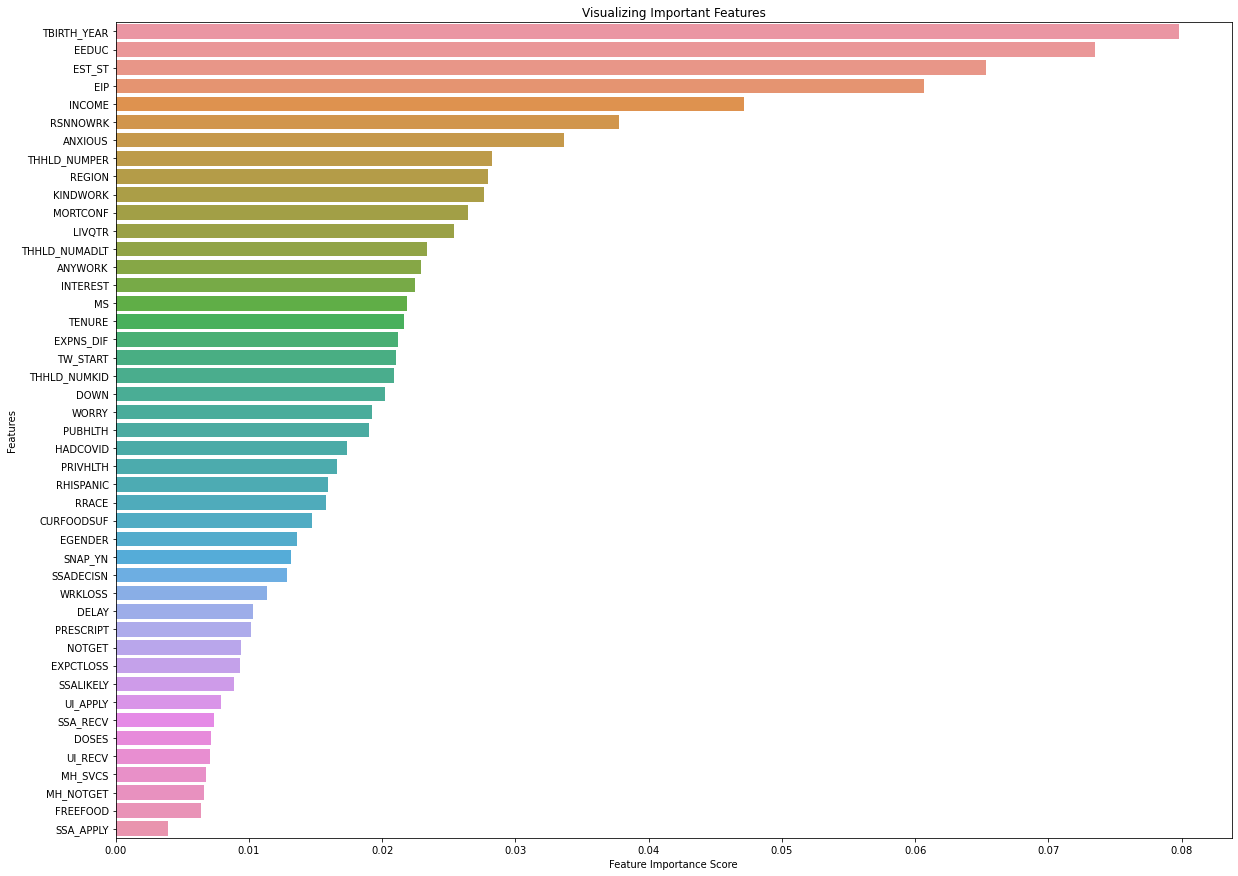

In [61]:
# View the feature scores 
plt.figure(figsize=(20,15))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

## Build Random Forest model on selected features 

In [62]:
X = df.drop(['GETVACC','SSA_APPLY'], axis=1)

Y = df['GETVACC']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state =42)

In [64]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.7553


## Confusion matrix

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5493 14899]
 [ 3402 50997]]


## Classification Report 

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.27      0.38     20392
           1       0.77      0.94      0.85     54399

    accuracy                           0.76     74791
   macro avg       0.70      0.60      0.61     74791
weighted avg       0.73      0.76      0.72     74791

